# Proyecto 04 - Series de Tiempo

## Punto de Partida: Proyecto 3: Series de Tiempo
### Dataset: Flujo Vehicular por Unidades de Peaje AUSA: datos de la autopista Illia, pago en Efectivo.

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.tsa as tsa
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

sns.set() 

In [2]:
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv',  sep =',')

##### Informaciòn adicional:  Dataset Flujo Vehicular por Unidades de Peaje AUSA año 2020

In [3]:
data_2020.info()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1847933 entries, 0 to 1847932
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   periodo         int64 
 1   fecha           object
 2   mes             object
 3   dia             object
 4   dia_fecha       int64 
 5   hora_inicio     int64 
 6   hora_fin        int64 
 7   estacion        object
 8   tipo_vehiculo   object
 9   forma_pago      object
 10  observacion     object
 11  sentido         object
 12  cantidad_pasos  int64 
dtypes: int64(5), object(8)
memory usage: 183.3+ MB


,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Centro,24
1,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80
2,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1
3,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1
4,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [4]:
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [5]:
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [6]:
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [7]:
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018,2019 y 2020 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [8]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [9]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
#Se detectan los valores atipicos
diario.cantidad_pasos[diario.cantidad_pasos <=10000] = np.nan
print(diario.isna().sum())
# Se realiza la interpolacion.
diario = diario.interpolate(method='nearest', k=4)
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


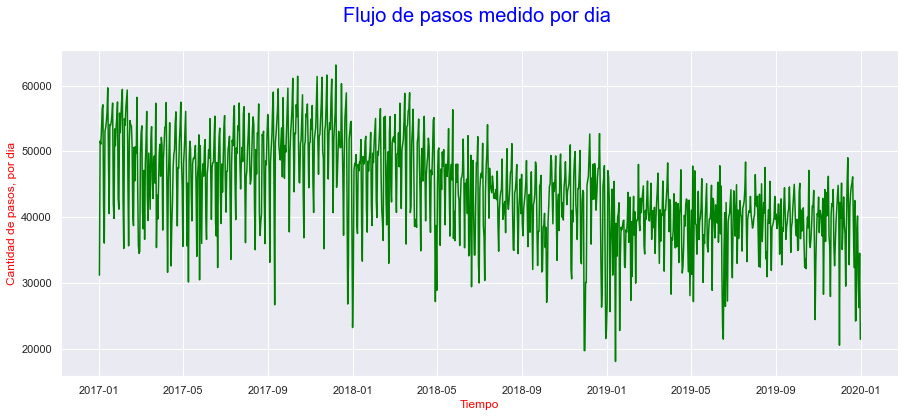

In [10]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos,color='green')
plt.title("Flujo de pasos medido por dia \n", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo', color='red')
plt.ylabel('Cantidad de pasos, por dia',color='red' )
plt.show()

In [11]:
semanal_m =diario.resample('W').mean()
print(semanal_m.shape)
semanal_m

(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2019-12-08,40413.000000
2019-12-15,38994.285714
2019-12-22,41840.142857


#### * Año 2020 *

In [12]:
#Sobre la estacion Illia
da_2020 =data_2020[data_2020.estacion=='ILLIA']
da_2020.describe(include='all')

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
count,215490.0,215490,215490,215490,215490.000000,215490.000000,215490.000000,215490,215490,215490,215490,215490,215490.000000
unique,NaN,274,9,7,NaN,NaN,NaN,1,12,7,20,2,NaN
top,NaN,2020-02-21 00:00:00,enero,Miércoles,NaN,NaN,NaN,ILLIA,Auto,Tag,Tag - PosPago,Centro,NaN
freq,NaN,1212,31057,34244,NaN,NaN,NaN,215490,96220,98368,47502,111629,NaN
mean,2020.0,NaN,NaN,NaN,15.606307,12.145858,12.397202,NaN,NaN,NaN,NaN,NaN,58.485948
std,0.0,NaN,NaN,NaN,8.770295,6.230917,6.322939,NaN,NaN,NaN,NaN,NaN,182.367450
min,2020.0,NaN,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2020.0,NaN,NaN,NaN,8.000000,7.000000,8.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,2020.0,NaN,NaN,NaN,16.000000,12.000000,13.000000,NaN,NaN,NaN,NaN,NaN,4.000000
75%,2020.0,NaN,NaN,NaN,23.000000,17.000000,18.000000,NaN,NaN,NaN,NaN,NaN,20.000000


In [13]:
#Sobre la estacion Illia
da_2020['forma_pago'].value_counts()

Tag                  98368
Efectivo             39072
Violación            27524
Rec.Deuda            21803
Exento               18098
Tarjeta Magnética     7712
CPP                   2913
Name: forma_pago, dtype: int64

In [14]:
# de todas las estaciones
data_2020['forma_pago'].value_counts()

Tag                  1045096
Violación             312230
Efectivo              196304
Rec.Deuda             130578
Exento                110340
Tarjeta Magnética      36006
CPP                    17379
Name: forma_pago, dtype: int64

## Analizando 2020

In [15]:
d_2020=data_2020[(data_2020.estacion=='ILLIA')& (data_2020.forma_pago == 'Efectivo')]
d_2020

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
52,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Efectivo,Efectivo,Centro,326
53,2020,2020-01-01 00:00:00,enero,Miércoles,1,0,1,ILLIA,Auto,Efectivo,Efectivo,Provincia,319
134,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,ILLIA,Auto,Efectivo,Efectivo,Centro,199
135,2020,2020-01-01 00:00:00,enero,Miércoles,1,1,2,ILLIA,Auto,Efectivo,Efectivo,Provincia,180
202,2020,2020-01-01 00:00:00,enero,Miércoles,1,2,3,ILLIA,Auto,Efectivo,Efectivo,Centro,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847017,2020,2020-09-29,septiembre,Martes,29,15,16,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847412,2020,2020-09-30,septiembre,Miércoles,30,8,9,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,1
1847475,2020,2020-09-30,septiembre,Miércoles,30,10,11,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Centro,1
1847506,2020,2020-09-30,septiembre,Miércoles,30,11,12,ILLIA,Pesados 6 Ejes,Efectivo,Efectivo,Provincia,2


In [16]:

#Quitamos las columnas que no vamos a utilizar
d_2020.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
d_2020['fecha2'] = pd.to_datetime(d_2020.fecha) + pd.to_timedelta(d_2020.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
d_2020.drop(columns=['fecha','hora_fin','dia_fecha'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
d_2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el d_2020 por fecha
d_2020.sort_values('fecha', inplace = True)
d_2020.reset_index(drop=True, inplace = True)
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
da_2020 = d_2020.resample('D', on = 'fecha').sum()
da_2020

,cantidad_pasos
fecha,
2020-01-01,21395
2020-01-02,33722
2020-01-03,37067
2020-01-04,30627
2020-01-05,27812
...,...
2020-09-26,5474
2020-09-27,3987
2020-09-28,5379


In [17]:
semanal_20_m =da_2020.resample('W').mean()
print(semanal_20_m.shape)
semanal_20_m

(40, 1)


,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


In [18]:
diario_2020= pd.concat([diario, da_2020])
diario_2020

,cantidad_pasos
fecha,
2017-01-01,31183.0
2017-01-02,51568.0
2017-01-03,51093.0
2017-01-04,53332.0
2017-01-05,56486.0
...,...
2020-09-26,5474.0
2020-09-27,3987.0
2020-09-28,5379.0


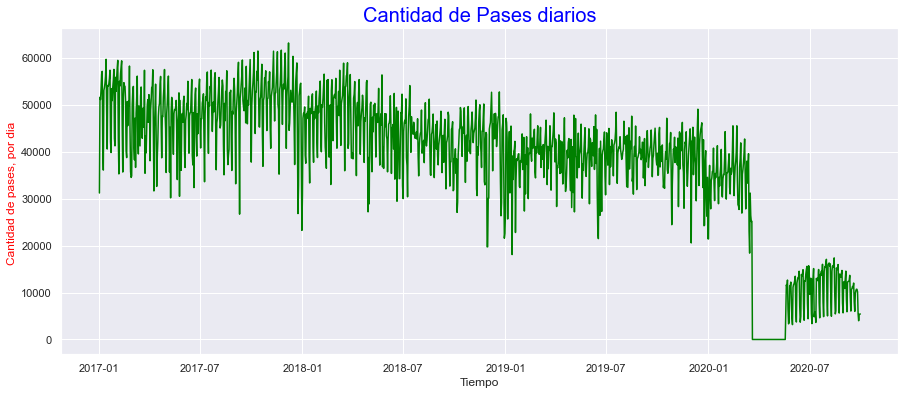

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario_2020.index, diario_2020.cantidad_pasos,color='green')
plt.title("Cantidad de Pases diarios", color= 'blue', fontsize= 20)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pases, por dia ',color='red' )
plt.show()

In [20]:
semanal_m_20 =diario_2020.resample('W').mean()
print(semanal_m_20.shape)
semanal_m_20

(197, 1)


,cantidad_pasos
fecha,
2017-01-01,31183.000000
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
...,...
2020-09-06,11058.428571
2020-09-13,11162.428571
2020-09-20,9964.142857


In [21]:
semanal_m_20=semanal_m_20[(semanal_m_20.index >='2017-01-08')&(semanal_m_20.index <='2020-09-27')]
semanal_m_20

,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2020-08-30,11842.571429
2020-09-06,11058.428571
2020-09-13,11162.428571


###### La metrica de Evaluacion elegida es RMSE dado el manejo de los valores atipicos que se ha realizado en el preprocesamiento de datos

In [22]:
from sklearn.metrics import mean_squared_error

#### Arima

*Uno de los métodos más comunes utilizados en la predicción de series de tiempo se conoce como el modelo ARIMA, que significa A utoreg R essive I ntegrado M oving A verage. ARIMA es un modelo que se puede ajustar a datos de series de tiempo para comprender o predecir mejor los puntos futuros de la serie.*

In [23]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

* Uno de los métodos disponibles en Python para modelar y predecir puntos futuros de una serie de tiempo se conoce como SARIMAX , que significa promedios móviles integrados autorregresivos estacionales con regresores eXógenos . 

In [24]:
import itertools
warnings.filterwarnings('ignore')

In [25]:
semanal_m=semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]
y=semanal_m
y


,cantidad_pasos
fecha,
2017-01-08,49601.714286
2017-01-15,52344.714286
2017-01-22,51030.714286
2017-01-29,50654.428571
2017-02-05,51343.000000
...,...
2019-12-01,38079.285714
2019-12-08,40413.000000
2019-12-15,38994.285714


In [26]:
semanal_m_2020=semanal_m_20[(semanal_m_20.index >='2017-01-08')&(semanal_m_20.index <='2020-09-27')]
y_2020=semanal_m_2020


In [27]:
y_2020['2020':]

,cantidad_pasos
fecha,
2020-01-05,29513.285714
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


semanal_20_m =da_2020.resample('W').mean()
print(semanal_20_m.shape)
semanal_20_m

In [28]:
semanal_2020_m=semanal_20_m[(semanal_20_m.index >='2020-01-05')&(semanal_20_m.index <='2020-03-15')]
y_2020=semanal_2020_m
y_2020

,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


In [29]:
y_2020['2020':]

,cantidad_pasos
fecha,
2020-01-05,30124.600000
2020-01-12,34765.571429
2020-01-19,35259.714286
2020-01-26,34456.000000
2020-02-02,36190.714286
2020-02-09,35306.428571
2020-02-16,37351.142857
2020-02-23,36728.000000
2020-03-01,33641.000000


* _*Se predice hasta el 22/03/2020, ya que ahi comienza la cuarentena**.*_

In [30]:
d=range(0,3)
p=q=range(8,13)
pdq=list(itertools.product (p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12)
              for x in list(itertools.product (p,d,q)) ]
print('Ejemplos de combinaciones de parametros para SARIMAX ....')
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{} x{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{} x{}'.format(pdq[2],seasonal_pdq[4]))

Ejemplos de combinaciones de parametros para SARIMAX ....
SARIMAX:(8, 0, 9) x(8, 0, 9, 12)
SARIMAX:(8, 0, 9) x(8, 0, 10, 12)
SARIMAX:(8, 0, 10) x(8, 0, 11, 12)
SARIMAX:(8, 0, 10) x(8, 0, 12, 12)


In [31]:
y= semanal_m.cantidad_pasos
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(10, 1, 8),
                                seasonal_order=(10, 1, 8, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4086     16.488     -0.025      0.980     -32.725      31.908
ar.L2         -0.4350     51.109     -0.009      0.993    -100.608      99.737
ar.L3         -0.1900     64.652     -0.003      0.998    -126.905     126.525
ar.L4         -0.3753     19.339     -0.019      0.985     -38.280      37.529
ar.L5          0.3739     47.876      0.008      0.994     -93.461      94.208
ar.L6         -0.3398     43.967     -0.008      0.994     -86.513      85.834
ar.L7         -0.4820     62.293     -0.008      0.994    -122.573     121.609
ar.L8          0.1621    144.366      0.001      0.999    -282.790     283.114
ar.L9          0.4892     72.448      0.007      0.995    -141.507     142.485
ar.L10        -0.2884     37.233     -0.008      0.994     -73.263      72.686
ma.L1         -0.2287     26.078     -0.009      0.9

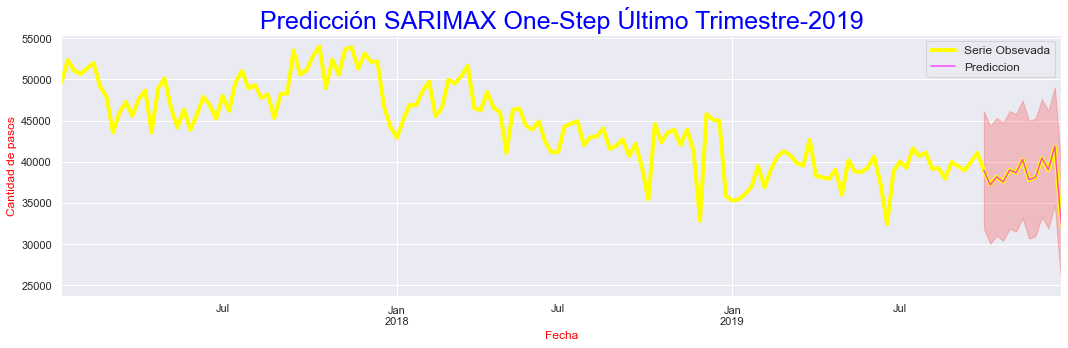

In [36]:

pred = results.get_prediction(start=datetime.datetime(2019,10,6), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2017':].plot(label='Serie Obsevada',color='yellow',lw = 4,figsize=(15,5))

pred.predicted_mean.plot(ax=ax, label='Prediccion', alpha=.7, color='magenta')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)
plt.title("Predicción SARIMAX One-Step Último Trimestre-2019", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha',color='red')
ax.set_ylabel('Cantidad de pasos',color='red')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

* Sin embargo, se puede obtener una mejor representación de nuestro verdadero poder predictivo utilizando pronósticos dinámicos. En este caso, solo usamos información de la serie de tiempo hasta cierto punto, y después de eso, los pronósticos se generan usando valores de puntos de tiempo previos previos. (dynamic=True)

**La prediccion con SARIMAX tanto One-Step, como Multi-Step es muy buena, los RSME que arroja son excelentes. Por lo tanto SARIMAX One-Step fue el modelo elegido para predecir el 2020**

### Año 2020

##### Producir y visualizar pronósticos
* Aprovechar nuestro modelo de serie temporal ARIMA estacional para pronosticar valores futuros. El get_forecast()atributo de nuestro objeto de serie temporal puede calcular valores pronosticados para un número específico de pasos adelante. Podemos usar la salida de este código para trazar la serie de tiempo y los pronósticos de sus valores futuros.

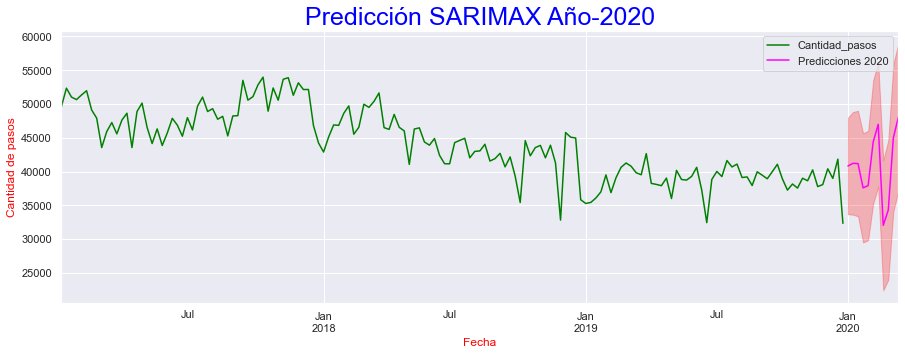

In [37]:
#graficando desde el 2017
pred_uc = results.get_forecast(steps=datetime.datetime(2020,3,15))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.25)
plt.title("Predicción SARIMAX Año-2020", color= 'blue', fontsize=25)
ax.set_xlabel('Fecha', color='red')
ax.set_ylabel('Cantidad de pasos', color='red')

plt.legend()
plt.show()

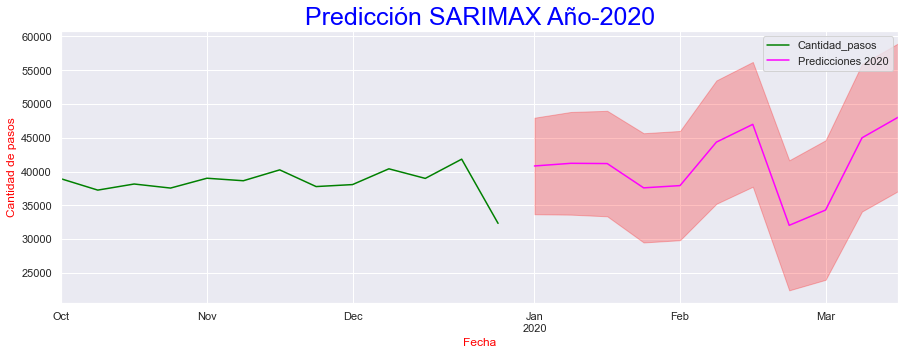

In [38]:
#Graficando desde el último trimestre del 2019
pred_uc = results.get_forecast(steps=datetime.datetime(2020,3,15))
pred_ci = pred_uc.conf_int()

ax = y.plot(label='Cantidad_pasos', color='green',figsize=(15,5))
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.25)
plt.title("Predicción SARIMAX Año-2020", color= 'blue', fontsize=25)
plt.xlim(datetime.datetime(2019,10,6), datetime.datetime(2020,3,15))
ax.set_xlabel('Fecha', color='red')
ax.set_ylabel('Cantidad de pasos', color='red')

plt.legend()
plt.show()

In [39]:
# Prediccion Sarimax
pred_uc.predicted_mean.plot(ax=ax, label='Predicciones 2020', color='magenta')

# 1º trimestre 2020 del 05/01/2020 al 15/03/2020 antes que empiece la cuarentena. Datos AUSA
fecha_i='2020-01-05'
fecha_f='2020-03-15'
y_2020=semanal_m_2020 [(semanal_m_2020.index >=fecha_i)&(semanal_m_2020.index <=fecha_f)]

y_s=pred_uc.predicted_mean
b_rmse=np.sqrt(mean_squared_error(y_2020, y_s))

---------------------------------
RMSE en Benchmark: 8270.690744010963
---------------------------------


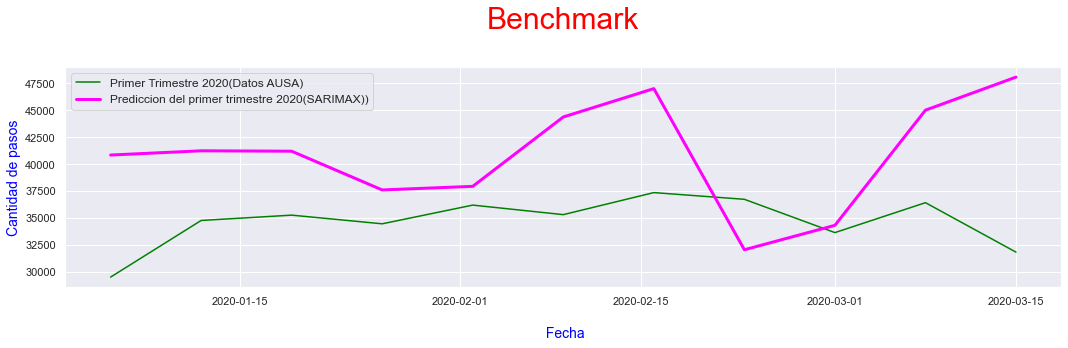

In [40]:
print('---------------------------------')
print(f'RMSE en Benchmark: {b_rmse}')
print('---------------------------------')

plt.figure(figsize=(15,5))
plt.plot(y_2020.index, y_2020.cantidad_pasos,color='green', label='Primer Trimestre 2020(Datos AUSA)')
plt.plot(y_2020.index, y_s, lw=3, color='magenta',label='Prediccion del primer trimestre 2020(SARIMAX))')
plt.title ('Benchmark\n', color='red', fontsize=30)
plt.xlabel('\n Fecha', color='blue',fontsize=14)
plt.ylabel('Cantidad de pasos', color='blue',fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## Conclusiones Finales

* _*Este Proyecto fue muy desafiante, requeririó de una búsqueda exhaustiva de documentaciòn extra, ya que contábamos perfectamente con las herramientas, pero no teníamos muy claro cómo implementarlas. Esto También nos ayudó, y considero que es lo que realiza un DS, a perder el medio a buscar y probar, tantas veces hasta obtener el resultado deseado.*_

* _*Los resultados obtenidos son muy buenos, pero hay que tener en cuenta que a veces se pueden mejorar.*_

* _*En cuanto a lo que me gustaria implementar, en el Proyecto 4,  sería Prophet o LSTM, y ver si mejoran las predicciones.*_

* _*Como sabemos las series de tiempo brindan la oportunidad de pronosticar valores futuros, basándose en valores anteriores. Las series de tiempo se pueden utilizar para pronosticar tendencias. Estamos asumiendo un supuesto muy importante: que el futuro se va a comportar como el pasado. Es importante saber  que estamos presuponiendo esto a la hora de trabajar con predicciones en series de tiempo. El futuro es incierto y podemos aproximarnos a lo que puede llegar a suceder, ¡pero siempre vamos a tener un componente de sorpresa! En este caso en particular los componentes sorpresas serian la Pandemis y con la Cuarentena implementada en en todo el pais, y sobre todo en el AMBA, y la obligatoiredad por parte del gobierno de la Ciudad a usar TELEPASE, lo que obviamente haria que los pagos en efectivo fueran casis nulos. Entonces seria interesante poder incorporar estas variables al moneto de predecir.*_

* _*El trabajo en equipo fue fudamental*_

## GitHub


* Profile: https://github.com/CristinaSacramone
* Repositorio: https://github.com/CristinaSacramone/Proyecto3Series-de-Tiempo

## Prophet

In [42]:
import pandas as pd
from fbprophet import Prophet

In [53]:
semanal_m_1 = semanal_m.copy()
semanal_m_1.reset_index(level=0, inplace=True)
semanal_m_1= semanal_m_1.rename(columns={'fecha': 'ds',
                        'cantidad_pasos': 'y'})
semanal_m_1.head()

,ds,y
0,2017-01-08,49601.714286
1,2017-01-15,52344.714286
2,2017-01-22,51030.714286
3,2017-01-29,50654.428571
4,2017-02-05,51343.000000


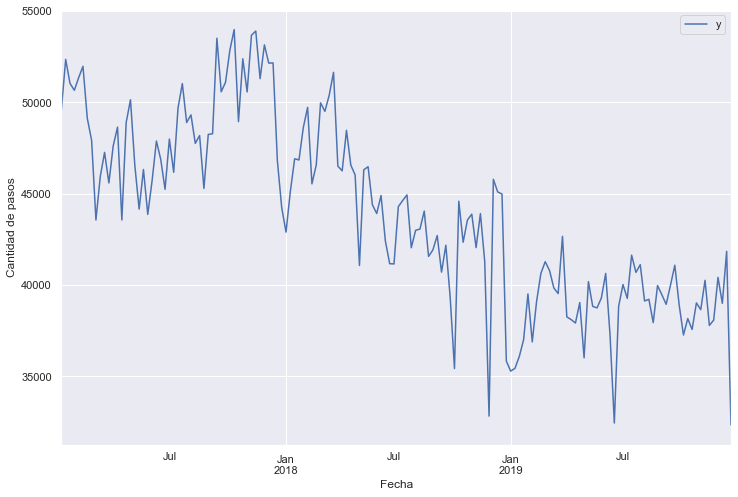

In [54]:
ax = semanal_m_1.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Cantidad de pasos')
ax.set_xlabel('Fecha')

plt.show()

In [55]:
my_model = Prophet()#interval_width=0.95

In [56]:
my_model.fit(semanal_m_1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [57]:
future_dates = my_model.make_future_dataframe(periods=11, freq='W')
future_dates.head()

,ds
0,2017-01-08
1,2017-01-15
2,2017-01-22
3,2017-01-29
4,2017-02-05


In [58]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
162,2020-02-16,35978.632669,33139.918432,39015.894810
163,2020-02-23,35623.267505,32617.274640,38540.903144
164,2020-03-01,35787.641475,32859.626377,38863.599592
165,2020-03-08,36170.317340,33208.007242,38904.882192
166,2020-03-15,36419.670037,33469.426134,39163.281738


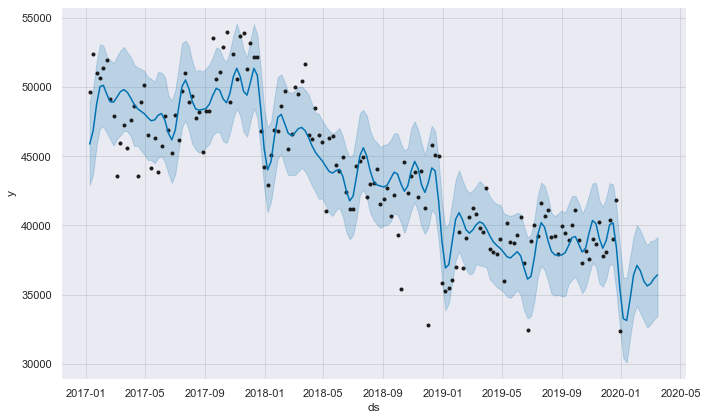

In [59]:
fig1 = my_model.plot(forecast)


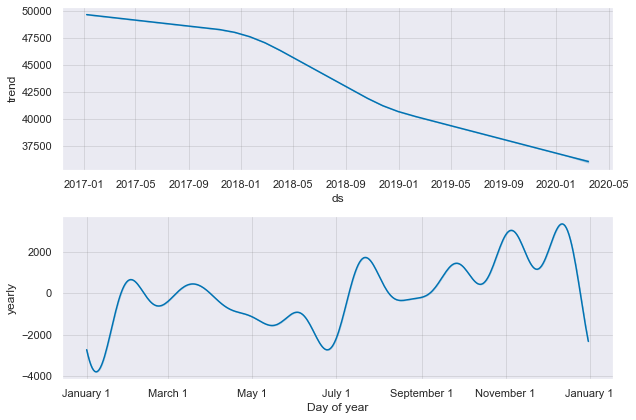

In [60]:
fig2 = my_model.plot_components(forecast)
